In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
np.set_printoptions(suppress=True, precision=5)

In [3]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [4]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-ustandaryzowane.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)
with open(os.path.join(outDir, "odl-1627838162.908691-gamma-4.0.pickle"), "rb") as plik:
    odl=pickle.load(plik)
with open(os.path.join(outDir, "odl-Ecola-wygladzone-ustandaryzowane.pickle1627817822.0182662dtw.pickle"), "rb") as plik:
    odlDtw=pickle.load(plik)

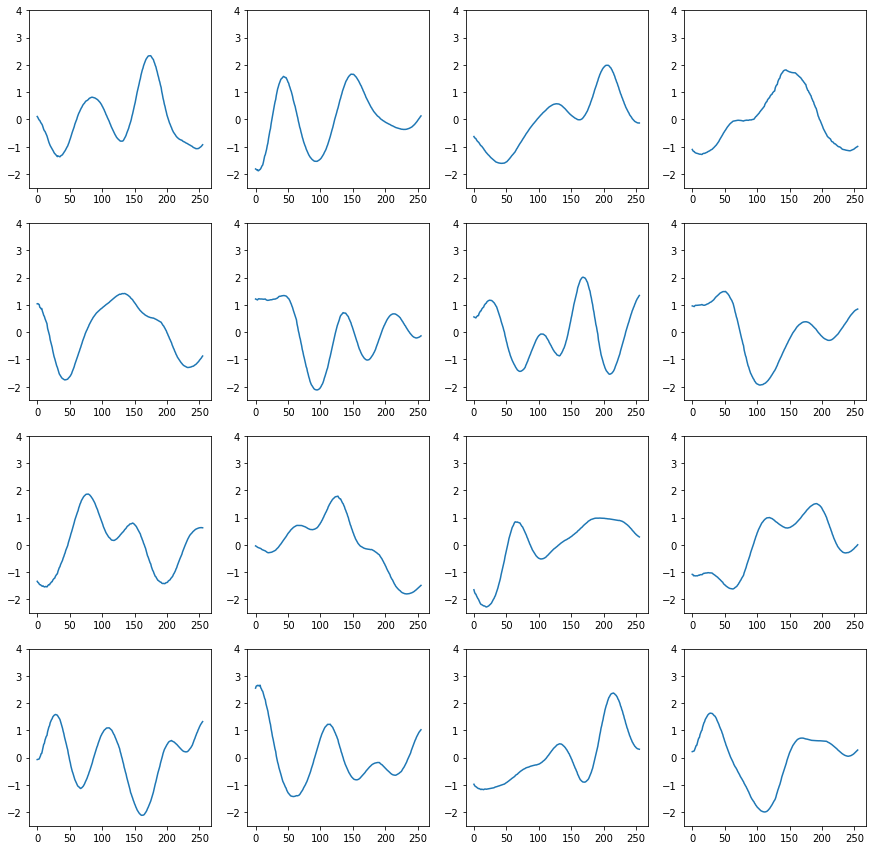

In [5]:
plt.gcf().set_size_inches(15,15)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(-2.5, 4)
    #plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregi[i,:])

# Softdtw

### Wykres silhouette

In [6]:
reExpr=re.compile(r".*4\.0\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [7]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [8]:
listaPasujacych

['1627823926.213649-n_cluster-6-gamma-4.0.pickle',
 '1627822047.0550363-n_cluster-3-gamma-4.0.pickle',
 '1627823613.2793171-n_cluster-5-gamma-4.0.pickle',
 '1627821192.3067713-n_cluster-2-gamma-4.0.pickle',
 '1627822668.1030443-n_cluster-4-gamma-4.0.pickle',
 '1627824764.8407075-n_cluster-7-gamma-4.0.pickle']

In [9]:
listaSilhouetteScore=[None for i in range(6)]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore[model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [12]:
listaSilhouetteScore

[0.21119283788653076,
 0.2259469232284517,
 0.2179103894986978,
 0.19659803983100677,
 0.19912249065447393,
 0.19028546868987503]

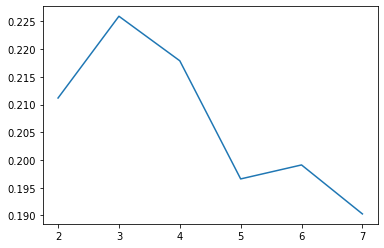

In [13]:
plt.plot(range(2,8), listaSilhouetteScore)

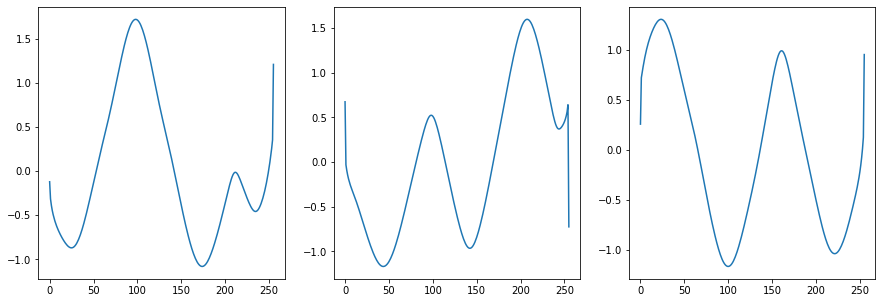

In [14]:
with open(os.path.join("../src/OutDir/",'1627822047.0550363-n_cluster-3-gamma-4.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,5)
for i in range(3):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.030)
    plt.plot(model.cluster_centers_[i].ravel())

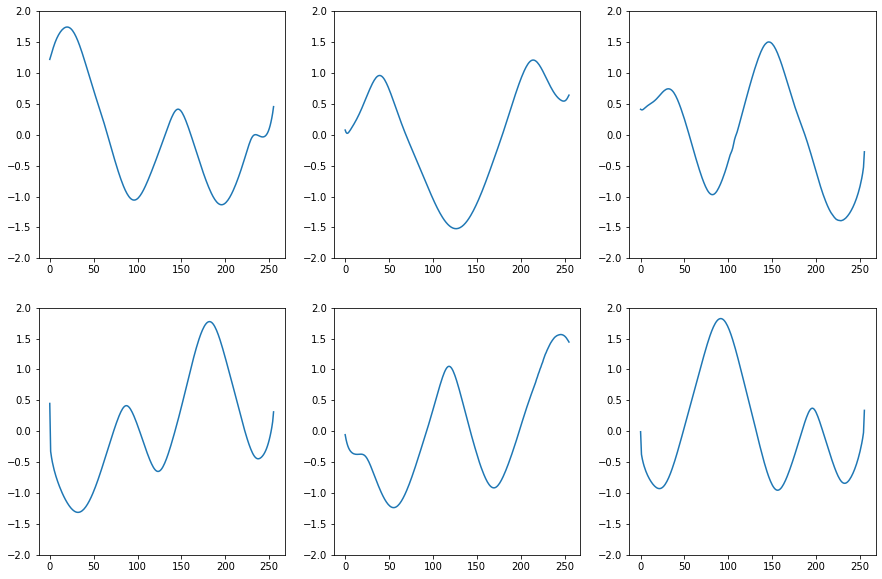

In [6]:
with open(os.path.join("../src/OutDir/",'1627823926.213649-n_cluster-6-gamma-4.0.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.ylim(-2, 2)
    plt.plot(model.cluster_centers_[i].ravel())

In [16]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4081 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [17]:
np.unique(etykiety, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([600, 622, 633, 730, 659, 837]))

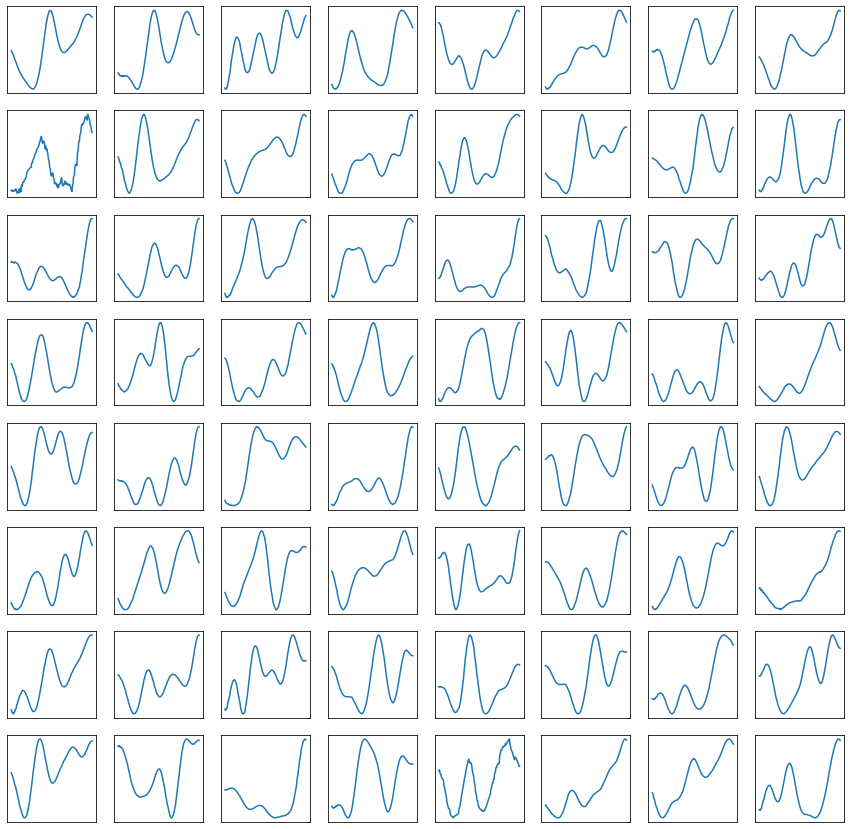

In [18]:
k=4
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

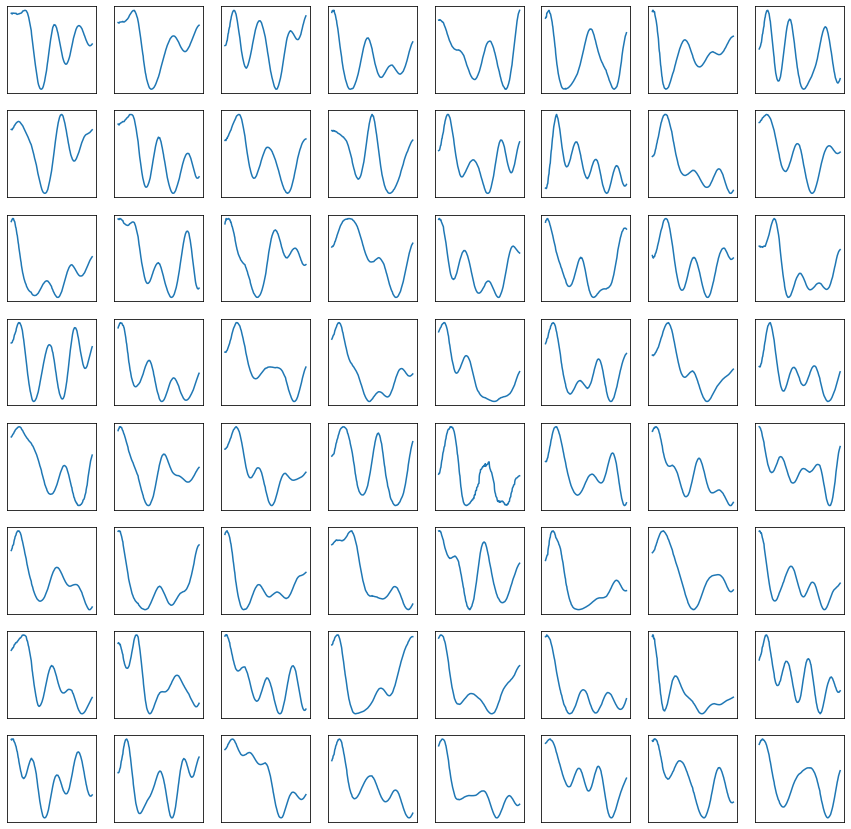

In [19]:
k=0
plt.gcf().set_size_inches(15,15)
szeregiWKtejGrupie=szeregi[etykiety==k,:]
for i in range(64):
    plt.subplot(8,8,i+1)
    #plt.ylim(0.005, 0.045)
    plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregiWKtejGrupie[i])

### KMeans 

In [20]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.27462259565987845,
 0.2376203656925263,
 0.2088770142210894,
 0.1711487613176208,
 0.14503511224133633,
 0.14609460860727558]

In [21]:
rozniceSil=np.array(listaSilhouetteScore)-np.array(kmeansSilList)
rozniceSil

array([-0.06343, -0.01167,  0.00903,  0.02545,  0.05409,  0.04419])

# Analiza

In [22]:
model.n_clusters

6

In [23]:
with open(os.path.join(outDir,"katalogFunkcjonalnosciGenow.pickle"), "rb") as plik:
    slownikFunGenow=pickle.load(plik)
with open(os.path.join(KatalogPickli,"Ecola-wygladzone-ustandaryzowane.pickle-paths"), "rb") as plik:
    szeregiNazwy=pickle.load(plik)

In [24]:
def zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy):
    wystapieniaLiter={}
    bledneNazwy=[]
    for k in range(model.n_clusters):
        maskaWyboru=(etykiety==k)
        wybraneNazwy=np.array(szeregiNazwy)[maskaWyboru]
        for nazwa in wybraneNazwy:
            if nazwa not in slownikFunGenow:
                bledneNazwy.append(nazwa)
                litera="XX"
            else:
                litera=slownikFunGenow[nazwa]
            if litera not in wystapieniaLiter:
                wystapieniaLiter[litera]=dict([(i,0) for i in range(model.n_clusters)])
            wystapieniaLiter[litera][k]+=1
    print(f"Liczba błędnych nazw: {len(bledneNazwy)}")
    return wystapieniaLiter, bledneNazwy

In [25]:
def rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, normalizacja=False):
    plt.gcf().set_size_inches(15,10)
    i=0
    L=list(wystapieniaLiter.items())
    L.sort()
    wystapieniaLiter=dict(L)
    czestosc=np.unique(etykiety, return_counts=True)[1]
    for litera in wystapieniaLiter:
        i+=1
        elementy=np.array(list(wystapieniaLiter[litera].items()))
        plt.subplot(5,5,i)
        if normalizacja:
            plt.bar(elementy[:,0], elementy[:,1]/czestosc)
        else:
            plt.bar(elementy[:,0], elementy[:,1])
        plt.title(litera)
        plt.tick_params(axis='both',which='both', bottom=False,top=False, labelbottom=False)
    plt.show()

In [26]:
wystapieniaLiter, bledneNazwy=zrobStatystykeWystapienGrupFunkcjonalnych(model, etykiety, szeregi, szeregiNazwy)

Liczba błędnych nazw: 387


In [27]:
bledneNazwy[0]

'lcl|NC_000913.3_cds_NP_414649.1_107 [gene=hofB] [locus_tag=b0107] [db_xref=UniProtKB/Swiss-Prot:P36645] [protein=T2SSE family protein] [protein_id=NP_414649.1] [location=complement(115714..117099)] [gbkey=CDS]'

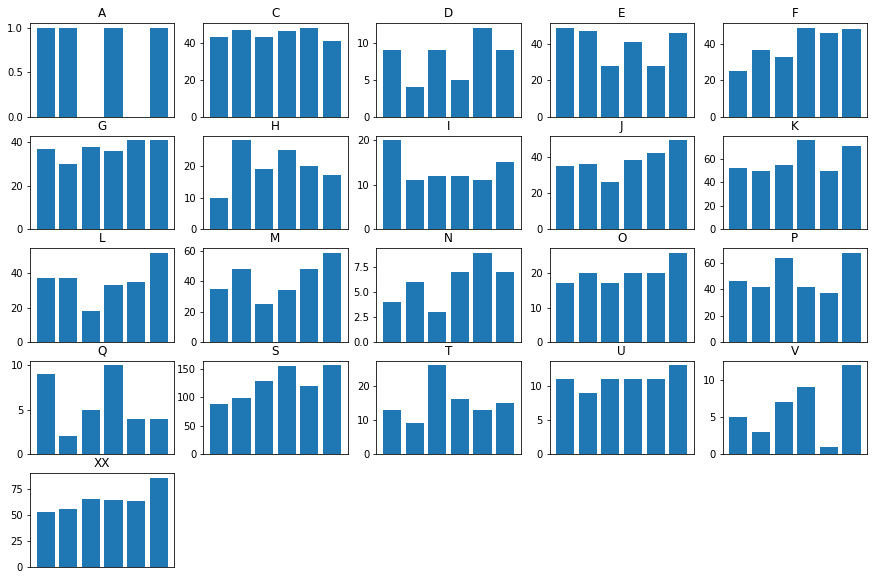

In [28]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety)

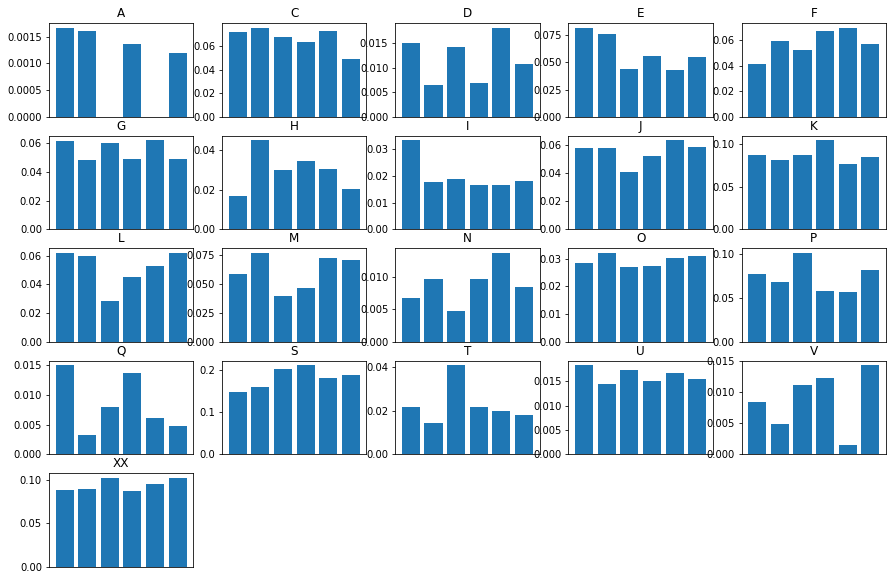

In [29]:
rysujWykresySlupkoweDlaGrupFunkcjonalnych(wystapieniaLiter, etykiety, True)